In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, avg, desc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

spark = SparkSession.builder.appName("ElectricVehicleAnalysis").getOrCreate()


In [2]:
file_path = "Electric_Vehicle_Population_Data_5000.csv"
df = spark.read.csv(file_path, header=True, inferSchema=True)
df.show(5)


+----------+---------+-------+-----+-----------+----------+------+-------+---------------------+-------------------------------------------------+--------------+---------+--------------------+--------------+--------------------+--------------------+-----------------+
|VIN (1-10)|   County|   City|State|Postal Code|Model Year|  Make|  Model|Electric Vehicle Type|Clean Alternative Fuel Vehicle (CAFV) Eligibility|Electric Range|Base MSRP|Legislative District|DOL Vehicle ID|    Vehicle Location|    Electric Utility|2020 Census Tract|
+----------+---------+-------+-----+-----------+----------+------+-------+---------------------+-------------------------------------------------+--------------+---------+--------------------+--------------+--------------------+--------------------+-----------------+
|WA1E2AFY8R| Thurston|Olympia|   WA|    98512.0|      2024|  AUDI|   Q5 E| Plug-in Hybrid El...|                             Not eligible due ...|          23.0|      0.0|                22.0|    

In [3]:
df.printSchema()
df.count(), len(df.columns)


root
 |-- VIN (1-10): string (nullable = true)
 |-- County: string (nullable = true)
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Postal Code: double (nullable = true)
 |-- Model Year: integer (nullable = true)
 |-- Make: string (nullable = true)
 |-- Model: string (nullable = true)
 |-- Electric Vehicle Type: string (nullable = true)
 |-- Clean Alternative Fuel Vehicle (CAFV) Eligibility: string (nullable = true)
 |-- Electric Range: double (nullable = true)
 |-- Base MSRP: double (nullable = true)
 |-- Legislative District: double (nullable = true)
 |-- DOL Vehicle ID: integer (nullable = true)
 |-- Vehicle Location: string (nullable = true)
 |-- Electric Utility: string (nullable = true)
 |-- 2020 Census Tract: double (nullable = true)



(5000, 17)

In [4]:
df = df.dropDuplicates()
df = df.na.drop(subset=["Model Year", "Make", "Electric Range"])
df.select("Model Year", "Make", "Electric Range").show(5)


+----------+-------+--------------+
|Model Year|   Make|Electric Range|
+----------+-------+--------------+
|      2015|  TESLA|         208.0|
|      2024| TOYOTA|          42.0|
|      2024| TOYOTA|          42.0|
|      2018|  TESLA|         215.0|
|      2022|HYUNDAI|           0.0|
+----------+-------+--------------+
only showing top 5 rows


In [5]:
df.describe(["Model Year", "Electric Range"]).show()


+-------+-----------------+-----------------+
|summary|       Model Year|   Electric Range|
+-------+-----------------+-----------------+
|  count|             5000|             5000|
|   mean|        2021.6216|          47.7732|
| stddev|3.153728371392817|84.19390408133415|
|    min|             2008|              0.0|
|    max|             2026|            330.0|
+-------+-----------------+-----------------+



C:\Users\Karthik Pujala\AppData\Local\Temp\ipykernel_15140\3853650637.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_makes_pd, x="Make", y="count", palette="viridis")


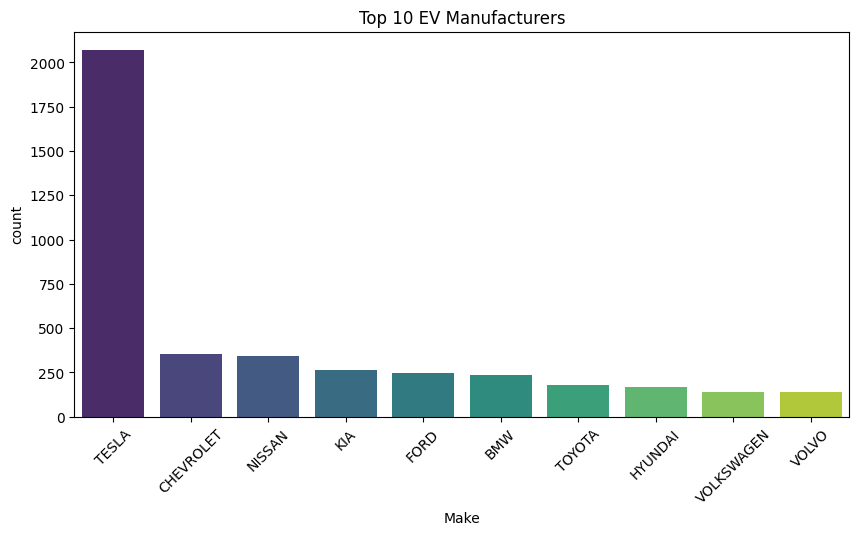

In [6]:
top_makes = df.groupBy("Make").count().orderBy(desc("count")).limit(10)
top_makes_pd = top_makes.toPandas()

plt.figure(figsize=(10,5))
sns.barplot(data=top_makes_pd, x="Make", y="count", palette="viridis")
plt.title("Top 10 EV Manufacturers")
plt.xticks(rotation=45)
plt.show()


C:\Users\Karthik Pujala\AppData\Local\Temp\ipykernel_15140\1090154420.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_range_pd, x="Make", y="AvgRange", palette="coolwarm")


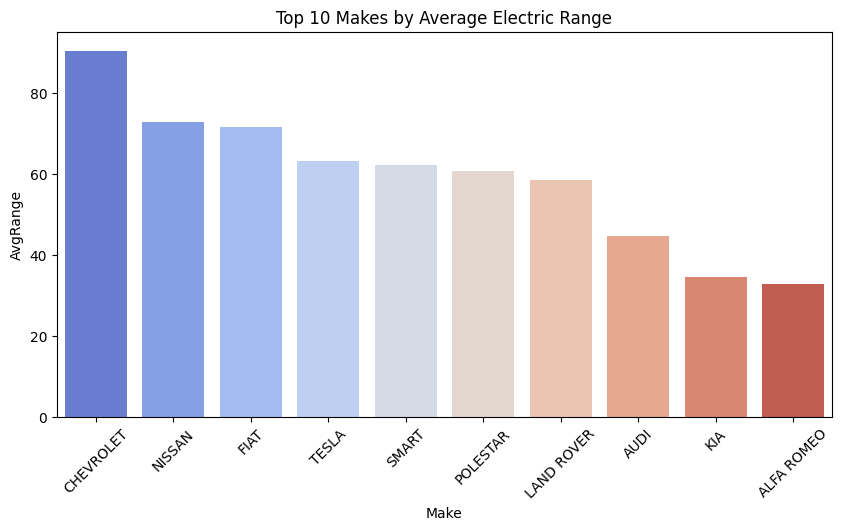

In [7]:
avg_range = df.groupBy("Make").agg(avg("Electric Range").alias("AvgRange")).orderBy(desc("AvgRange")).limit(10)
avg_range_pd = avg_range.toPandas()

plt.figure(figsize=(10,5))
sns.barplot(data=avg_range_pd, x="Make", y="AvgRange", palette="coolwarm")
plt.title("Top 10 Makes by Average Electric Range")
plt.xticks(rotation=45)
plt.show()


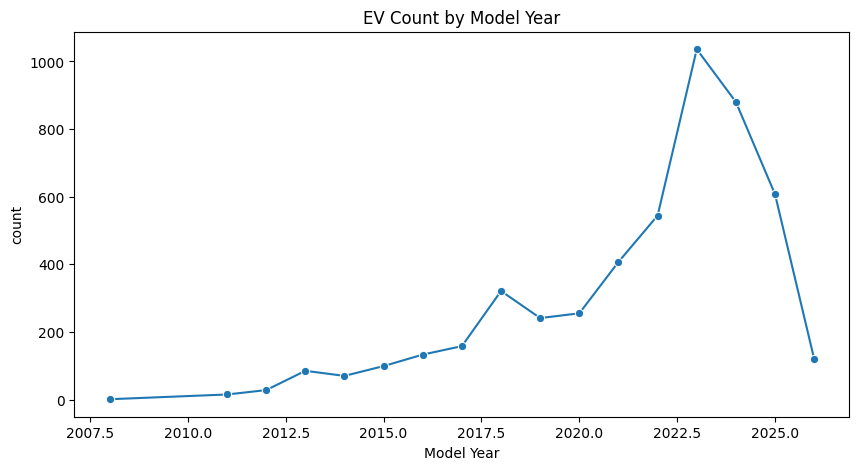

In [8]:
yearly = df.groupBy("Model Year").count().orderBy("Model Year")
yearly_pd = yearly.toPandas()

plt.figure(figsize=(10,5))
sns.lineplot(data=yearly_pd, x="Model Year", y="count", marker="o")
plt.title("EV Count by Model Year")
plt.show()


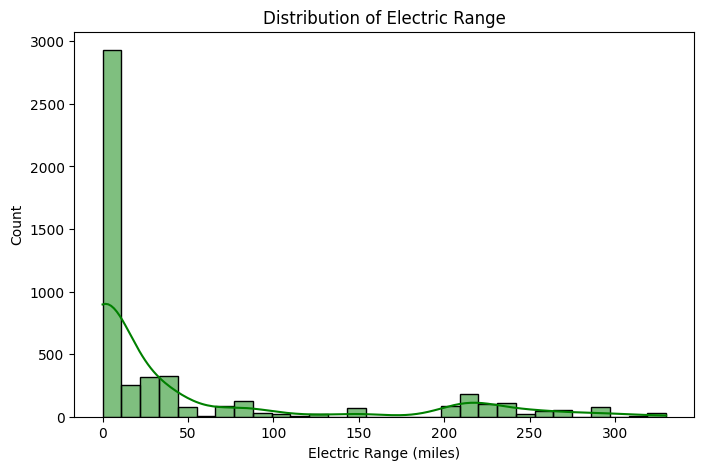

In [9]:
range_pd = df.select("Electric Range").toPandas()

plt.figure(figsize=(8,5))
sns.histplot(range_pd["Electric Range"], bins=30, kde=True, color="green")
plt.title("Distribution of Electric Range")
plt.xlabel("Electric Range (miles)")
plt.show()


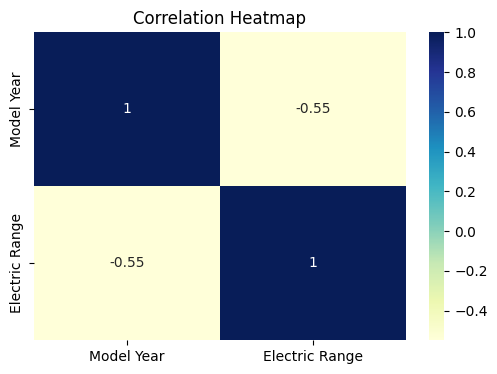

In [10]:
numeric_df = df.select("Model Year", "Electric Range").toPandas()

plt.figure(figsize=(6,4))
sns.heatmap(numeric_df.corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()


In [12]:
output_path = "Cleaned_Electric_Vehicle_Data.csv"
df.toPandas().to_csv(output_path, index=False)
print("✅ Cleaned dataset saved as CSV successfully at:", output_path)


✅ Cleaned dataset saved as CSV successfully at: Cleaned_Electric_Vehicle_Data.csv
